<center><font size=10>Identify Important Stocks</font></center>



# Prepare data 
 Download randonly selected 500 stock prices from Nasdaq from Jan 1 ,2016 to Jan 1,2017. 

We need the following package 

In [ ]:
!pip install pandas_datareader

In "companylist.csv", it includes 3197 companies 

In [3]:
import pandas as pd
import numpy as np
StockList = pd.read_csv("companylist.csv")['Symbol']
print(StockList.shape)
StockList.head()

(3197,)


0     PIH
1    FLWS
2    FCCY
3    SRCE
4    VNET
Name: Symbol, dtype: object

In [ ]:
len(StockList)


Next we define the start and end days

In [3]:

from pandas_datareader import data # we need modules data as a tool to download historical stock data
from datetime import datetime
start=datetime(2016, 1, 1)
end=datetime(2017, 1, 1)

We will randomly select 1000 stocks because some stocks cannot be downlowed and some stocks have NaN values.  

In [ ]:
import numpy as np
randomlist=np.random.choice(len(StockList), size=1000, replace=False) 
#randomlist includes 1000 different random numbers >=0 < len(StockList)
# we take 1000 random numbers just in case that some stocks' data cannot be downloaded. 
len(randomlist)
StockList.loc[randomlist[0]] #select the first row in the randomlist 


In [ ]:
# now we want to dowload 500 random companies, but some get error when downloading , see belows
from pandas_datareader._utils import RemoteDataError
total=0 # count how many companies downloaded 
i=0
market=pd.DataFrame()
while total<1000:
    symbol=StockList.loc[randomlist[i]]
    try:
        market[symbol]= data.DataReader(symbol,'yahoo', start, end)['Close']
    except RemoteDataError: 
        print("error at", total )
    # try except is to catch error when some stocks cannot be downloade. The error is catched so that the program can contin
    # to run  without interruption. 
    i=i+1
    total=total+1
    print(total)
  

In [ ]:
print(market.shape)
market.head()

Totally we have downloaded 763 (number of columns) stocks. But from the head of DataFrame, we can find that, some stocks are missing. We need to delete columns which have NaN values 

In [ ]:
market_clean=market.dropna(axis=1)
# axis : {0 or ‘index’, 1 or ‘columns’}
print(market_clean.shape)
market_clean.head()

Now we only have 690 stocks. We will keep the first 500 columns as those 500 stocks on which we will build a network. 

In [ ]:
nasdaq=market_clean.iloc[:,:500]

We do not need to download stocks everytime we open this ipynb by saving DataFrame as a csv file. 

In [ ]:
nasdaq.to_csv("NasdaqData.csv")  # You can choose any file name "xxx.csv"

Next time when we open this ipynb, we can read this file directly.

In [4]:
nasdaq=pd.DataFrame.from_csv('NasdaqData.csv')
print(nasdaq.shape)
nasdaq.head()

(253, 500)


,SLM,AGNCB,EGHT,LABL,INCR,TCBIP,NCBS,AXSM,SIFI,QURE,...,TSLA,ESIO,EGBN,DTRM,OFED,WPCS,BPTH,HALL,EAGL,IPWR
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,6.52,23.660000,11.45,59.810001,48.509998,25.420000,31.790001,9.27,13.65,16.540001,...,240.009995,5.19,50.470001,2.59,18.65,1.39,1.25,11.69,9.56,8.00
2016-01-04,6.54,23.799999,10.81,58.200001,46.610001,25.530001,31.790001,12.19,13.59,15.810000,...,223.410004,5.60,48.450001,2.32,18.65,1.40,1.28,11.52,9.73,7.94
2016-01-05,6.39,23.799999,11.19,58.070000,47.119999,25.590000,31.790001,14.98,13.67,16.170000,...,223.429993,5.53,49.480000,2.34,18.65,1.36,1.33,11.52,9.66,7.92
2016-01-06,6.10,23.820000,11.02,57.889999,47.230000,25.260000,31.650000,14.47,14.14,14.910000,...,219.039993,5.53,49.950001,2.21,18.65,1.47,1.33,11.52,9.68,8.00
2016-01-07,5.82,23.629999,10.54,59.070000,45.610001,24.770000,31.480000,12.45,13.80,17.280001,...,215.649994,5.48,48.830002,2.06,18.65,1.38,1.37,11.22,9.61,7.67


# Build network 

First we will compute correlation between each pair of stocks as follows

In [5]:
COR=nasdaq.corr()
print(type(COR))
print(COR.shape)
print(COR.head())
COR

<class 'pandas.core.frame.DataFrame'>
(500, 500)
            SLM     AGNCB      EGHT      LABL      INCR     TCBIP      NCBS  \
SLM    1.000000  0.300081  0.530221  0.807551  0.755816  0.263742  0.784228   
AGNCB  0.300081  1.000000  0.689021  0.542185  0.142734  0.757523  0.446184   
EGHT   0.530221  0.689021  1.000000  0.791139  0.290685  0.765227  0.476098   
LABL   0.807551  0.542185  0.791139  1.000000  0.640286  0.656157  0.714542   
INCR   0.755816  0.142734  0.290685  0.640286  1.000000  0.136398  0.660517   

           AXSM      SIFI      QURE    ...         TSLA      ESIO      EGBN  \
SLM   -0.463792  0.506735 -0.650656    ...    -0.126973 -0.334592  0.945607   
AGNCB -0.481860 -0.396067 -0.785410    ...     0.251273 -0.305921  0.284939   
EGHT  -0.559546 -0.265214 -0.780120    ...    -0.172000 -0.573971  0.424715   
LABL  -0.398679  0.120285 -0.732572    ...    -0.072752 -0.608959  0.758740   
INCR   0.025304  0.430930 -0.340276    ...     0.170118 -0.300346  0.744452   

 

,SLM,AGNCB,EGHT,LABL,INCR,TCBIP,NCBS,AXSM,SIFI,QURE,...,TSLA,ESIO,EGBN,DTRM,OFED,WPCS,BPTH,HALL,EAGL,IPWR
SLM,1.000000,0.300081,0.530221,0.807551,0.755816,0.263742,0.784228,-0.463792,0.506735,-0.650656,...,-0.126973,-0.334592,0.945607,0.231181,0.664676,-0.166902,-0.390707,0.346416,0.696728,-0.492781
AGNCB,0.300081,1.000000,0.689021,0.542185,0.142734,0.757523,0.446184,-0.481860,-0.396067,-0.785410,...,0.251273,-0.305921,0.284939,-0.269104,0.423202,0.370184,-0.063163,-0.080901,0.522309,-0.151322
EGHT,0.530221,0.689021,1.000000,0.791139,0.290685,0.765227,0.476098,-0.559546,-0.265214,-0.780120,...,-0.172000,-0.573971,0.424715,-0.017845,0.680622,0.222100,-0.474860,-0.043446,0.589070,-0.096585
LABL,0.807551,0.542185,0.791139,1.000000,0.640286,0.656157,0.714542,-0.398679,0.120285,-0.732572,...,-0.072752,-0.608959,0.758740,0.116579,0.644520,0.023172,-0.435876,0.240984,0.630506,-0.203416
INCR,0.755816,0.142734,0.290685,0.640286,1.000000,0.136398,0.660517,0.025304,0.430930,-0.340276,...,0.170118,-0.300346,0.744452,0.198745,0.463266,-0.171147,-0.170676,0.294867,0.501391,-0.195488
TCBIP,0.263742,0.757523,0.765227,0.656157,0.136398,1.000000,0.283301,-0.356173,-0.439273,-0.660429,...,-0.030912,-0.645925,0.256317,-0.061068,0.468573,0.323280,-0.382692,-0.194785,0.392107,0.126429
NCBS,0.784228,0.446184,0.476098,0.714542,0.660517,0.283301,1.000000,-0.261383,0.389096,-0.662543,...,0.125743,-0.149671,0.765078,-0.159867,0.532852,-0.054935,-0.001095,0.370673,0.634154,-0.517861
AXSM,-0.463792,-0.481860,-0.559546,-0.398679,0.025304,-0.356173,-0.261383,1.000000,0.074577,0.650063,...,0.366388,0.287064,-0.363289,-0.120406,-0.561341,0.043892,0.410887,0.109211,-0.566658,0.463856
SIFI,0.506735,-0.396067,-0.265214,0.120285,0.430930,-0.439273,0.389096,0.074577,1.000000,0.113889,...,0.030860,0.351640,0.574681,0.159164,0.017600,-0.297373,0.112351,0.449292,0.101997,-0.468604
QURE,-0.650656,-0.785410,-0.780120,-0.732572,-0.340276,-0.660429,-0.662543,0.650063,0.113889,1.000000,...,0.048963,0.492849,-0.569055,0.017677,-0.699467,-0.141691,0.392128,-0.147956,-0.762341,0.382963


We want to define a connection between two stocks  if two stocks' correlation is large enough.

How large is enough? we will take 10% quantile(threshold on negative side) and 90% quantile (threshold on positive side) as cutoff thresholds. 



## How to find quantile

First we get namelist in COR which are the names of stocks which are kept. 

In [6]:
namelist=list(COR.columns)
print(len(namelist))


500


How to use name of stocks to call the correlation values from "COR"? The type of COR is DataFrame.

In [7]:
print(type(COR))
print(namelist[0],namelist[1])

<class 'pandas.core.frame.DataFrame'>
SLM AGNCB


To find correlation between STRM and PFMT is easy using loc method of DataFrame

In [8]:
COR.loc[namelist[0],namelist[1]]   #loc(col name, row name)

0.30008093106219175

The first element of loc is the index name 'STRM' and the second element of loc is the column name 'PFMT'

Now we can use for loop to get a list of correlation (excluding self-correlation)

In [9]:
correlation=[]
for i in range(1,len(namelist)): # i is row number,namelist[i] is row name
    for j in range(0,i):  #j is column number, namelist[j] is column name, 
        correlation.append(COR.loc[namelist[j],namelist[i]])  #get the cottelation of multiple stock advoid duplication
print(len(correlation)) 


124750


10% quantile is -0.571092720226
90% quantile is 0.788411600589


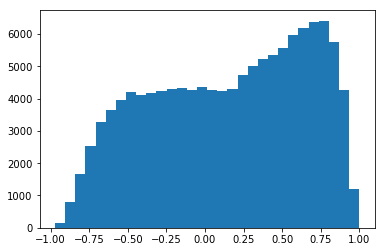

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# correlation might not necessary organized in order, hist can order the value of corr from small to large
# and find out the frequency of it
plt.hist(correlation,bins=30)
q90=np.percentile(correlation,90)
q10=np.percentile(correlation,10)
print("10% quantile is",np.percentile(correlation,10) )
print("90% quantile is",np.percentile(correlation,90) )

## Build a network 

If correlation is larger than  q90 or smaller than q10, connection(edge) between these two stocks  exists and the weight of edge  is given by the correlation.  

We have used loops for get correlation values which can  be applied again in building network. 

In [11]:
import networkx as nx
MarketGraph=nx.Graph()
for i in range(1,len(namelist)):
    for j in range(0,i):
        co=COR.loc[namelist[j],namelist[i]]
        if co>q90 or co <q10:
            MarketGraph.add_edge(namelist[j],namelist[i],corr=co)


In [12]:
print(nx.info(MarketGraph))

Name: 
Type: Graph
Number of nodes: 481
Number of edges: 24950
Average degree: 103.7422


We have 472 nodes, which means all stocks have at least one strong correlation with other stocks. 

Next we try to visualize our network

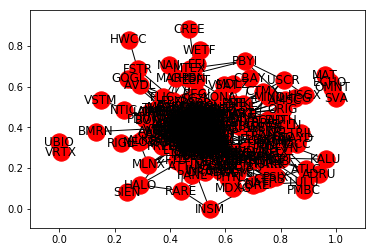

In [13]:
nx.draw_networkx(MarketGraph)

# Identify important stocks

## **Question 1**: 
Rank betweenness centrality and closeness centrality,  print out top 3 companies for each.  Explain the meaning of betweenness and closeness  centrality using top 3 companies you find.  Are top 3 companies the same using two different centrality measures? Explain why two top 3 lists are different by googling news and backgrounds of these companies happened in 2016.

In [15]:
betweenness = nx.betweenness_centrality(MarketGraph)
print('Top 3 Betweenness centrality: ', sorted(betweenness.items(), key = lambda x: x[1], 
                                         reverse = True)[:3])

Top 3 Betweenness centrality:  [('BIS', 0.036316008041944306), ('VIIX', 0.02565758408392445), ('LMFA', 0.02365409272071139)]


In [78]:
def count_cor(stock):
    pos=neg=a=0
    for i in range(len(COR)):
        if COR[stock][i]<q10: 
            neg+=1 
            a+=1
        if COR[stock][i]>q90: 
            pos+=1
            a+=1
    print(stock,'has',a,'of stocks are',str(round(neg/a,2)),'negative',str(round(pos/a,2)),'positive correlated')


In [79]:
n = ['BIS','VIIX','LMFA']
for i in range(3):
    count_cor(n[i])

BIS has 196 of stocks are 0.99 negative 0.01 positive correlated
VIIX has 273 of stocks are 0.94 negative 0.06 positive correlated
LMFA has 206 of stocks are 0.96 negative 0.04 positive correlated


In [62]:
closeness = nx.closeness_centrality(MarketGraph)
print ('Top3 closeness centrality:', sorted(closeness.items(), key = lambda x: x[1], reverse = True)[:3])


Top3 closeness centrality: [('SGLB', 0.6438445667125172), ('VIIX', 0.6377043596730245), ('RAVE', 0.6368367346938776)]


In [80]:
n = ['SGLB','VIIX','RAVE']
for i in range(3):
    count_cor(n[i])

SGLB has 279 of stocks are 0.92 negative 0.08 positive correlated
VIIX has 273 of stocks are 0.94 negative 0.06 positive correlated
RAVE has 269 of stocks are 0.88 negative 0.12 positive correlated


In [83]:
degree_cent = nx.degree_centrality(MarketGraph)
print(' degree centrality: ', sorted(degree_cent.items(), key = lambda x: x[1], 
                                             reverse = True)[:3])


Facebook degree centrality:  [('SGLB', 0.5791666666666666), ('VIIX', 0.5666666666666667), ('RAVE', 0.5583333333333333)]


#### ANS:
Top 3 companies are not the same.

High betweenness centrality shows information flow through that stock the most time between different correlated stocks. BIS: Bank for International Settlements is linked with 60 member central banks; VIIX is a index that reflect volatility of S&P 500 index; LMFA provides funding to nonprofit community. These stocks gather information from many other stocks, so these three stock price change might change together with a large group of other stocks. The % of negative correlation shows the three stock capture the most price change of other stock.

High closeness means these stock can respond fast under the financial market change given they have shortest distance with any other nodes. The three companies are the same as degree centrality, which means they have the highest degree with other stock. Then they are highly influenced by others. SGLB a resturant group and RAVE a technology firm are not the same in the betweenness centrality, both stock price very volatile and sensitive to the market.

RAVE: http://www.nrn.com/blog/could-rave-be-taken-private this stock has dropped steeply in 2016 due to announced large net loss and negative EBITDA
SGLB: drop massively due to increase net loss in 2016

## Question 2. 

Find top 3 grey cardinal stocks in this market. Explain why they are grey cardinal after googling some backgrounds and news.  

### eigenvector centrality

In [36]:
eigencentrality = nx.eigenvector_centrality(MarketGraph)
print ('Facebook eigenvector centrality:', sorted(eigencentrality.items(), key = lambda x: x[1], 
                                                  reverse = True)[:3])

Facebook eigenvector centrality: [('RAVE', 0.08605596710971684), ('CREG', 0.08325706855804178), ('TTEK', 0.08325447244196382)]


In [81]:
n=['RAVE','CREG','TTEK']
for i in range(3):
    count_cor(n[i])

RAVE has 269 of stocks are 0.88 negative 0.12 positive correlated
CREG has 268 of stocks are 0.88 negative 0.12 positive correlated
TTEK has 231 of stocks are 0.28 negative 0.72 positive correlated


#### ANS:
The three companies are correlated with the most other centers that are influencial. RAVE due to the steep stock price drop, so it has strong (negative) correlation with most of the center. CREG is China Recycling Energy Corporation stock price had decrease overyear and in 2016 has reverse stock split in order to keep listing in the market. TTEK provides service for tech, construction etc experienced rapid growth and linked with many different industry

## Qestion 3. 
Raise the water levels in  your graph such that the absolute values of weights are greater than 0.9. Find top 3 grey cardinal stocks in this new subgraph. Are they the the same as those in ORGINAL graph? why ? 

In [34]:
# only build network for stock has correlation has absolute value > 0.9
MarketGraph2=nx.Graph()
for i in range(1,len(namelist)):
    for j in range(0,i):
        co=COR.loc[namelist[j],namelist[i]]
        if np.abs(co)>0.9:
            MarketGraph2.add_edge(namelist[j],namelist[i],corr=co)


In [35]:
eigencentrality = nx.eigenvector_centrality(MarketGraph2)
print ('Facebook eigenvector centrality:', sorted(eigencentrality.items(), key = lambda x: x[1], 
                                                  reverse = True)[:3])

Facebook eigenvector centrality: [('PEBO', 0.15017674075658663), ('CASH', 0.1481647064565265), ('KRNY', 0.14775378681082707)]


#### ANS:
Not the same. Because now only show the stocks have strong correlation with others (0.9), now the new grey cardinals are which stocks have high eigenvalue centrality as well as strong correlation with other stock. The original grey cardinal although has high eigenvalue, it might have weak correlation with the other stock 